# Question 1: Homogeneous and Non-Homogeneous Poisson Process

(i) Write code to generate spikes using a Poisson process and sample a
homogeneous Poisson spike train with firing rate of 35 Hz.

In [35]:
from math import *
import numpy as np

#### HOMOGENEOUS POISSON ####

firing_rate = 35
total_time = 1 #in seconds

n_spikes = int(firing_rate * total_time)
isis = np.random.exponential(scale=1 / firing_rate, size=n_spikes)
spike_times = np.cumsum(isis)

spike_times = spike_times[spike_times < total_time] #filter out spikes that exceed the total time
print(len(spike_times))
print("Homogeneous Spike times (in seconds):", spike_times)

35
Homogeneous Spike times (in seconds): [0.04017797 0.04311689 0.07011362 0.08808375 0.09618381 0.14930652
 0.15376858 0.20120129 0.26753841 0.33871473 0.36826325 0.39322589
 0.42116841 0.4676883  0.47866732 0.53481733 0.59066891 0.66180321
 0.67574623 0.68426172 0.69519581 0.71735968 0.72493445 0.73917299
 0.80152949 0.81095996 0.82275558 0.82513221 0.83282472 0.86587459
 0.87181692 0.8873741  0.89526702 0.92782784 0.95090785]


(ii) Extend your code to sample from an inhomogeneous Poisson neuron
that has a 5 ms absolute refractory period, keeping the overall firing
rate at 35 Hz (35 spikes per second).

In [ ]:
''' 5ms refractory period after each spike, same firing rate, same total time.
Therefore to keep the overall firing rate the same,
effective frequency is higher to take account of the neuron behaviour.
We simply remove spike timings that "disturbs" the refractory period.
'''

#### INHOMOGENEOUS POISSON ####

refractory_period = 0.005 #5ms
lambda_effective = firing_rate / (1 - firing_rate * refractory_period)
n_spikes = int(lambda_effective * total_time) 
isis_inhomogeneous = np.random.exponential(scale=1 / lambda_effective, size=n_spikes)

''' idea is to add refractory period after each isi to get the spike times'''
time_stamp = 0
spike_times_inhom = []
for spike_t in isis_inhomogeneous:
    time_stamp += spike_t
    if time_stamp > total_time:
        break
    spike_times_inhom.append(time_stamp)
    time_stamp += refractory_period

print(len(spike_times_inhom))
print("Inhomogeneous Spike times (in seconds):", spike_times_inhom)


41
Inhomogeneous Spike times (in seconds): [0.017822750920835597, 0.07966404924007792, 0.08671553135070677, 0.094756290069384, 0.16720894140844506, 0.17922814482273053, 0.19059412045439061, 0.29051521644023515, 0.29776010124414265, 0.30800930800837223, 0.3223444757294181, 0.35417726967319035, 0.3595656107329667, 0.3708429504733499, 0.38067334189268387, 0.3902578227614883, 0.4030499088369942, 0.4442539156726453, 0.4832512695071536, 0.5226051718572855, 0.5484694134786852, 0.5716920941243013, 0.6002964953833881, 0.6165804123841515, 0.6366413844333686, 0.6621344398414012, 0.6905985326998495, 0.7186412158631937, 0.7266640820517343, 0.7426737058995718, 0.7511188723359881, 0.7953357486932745, 0.8215379518446894, 0.8321149981432729, 0.8423822686797873, 0.8541448510975609, 0.863812245118271, 0.8792052071963168, 0.9349913382491601, 0.9512102412943155, 0.9662732307483427]


(iii) Calculate the spike-count Fano factor and ISI coefficient of variation
for the homogeneous and refractory-inhomogeneous neurons sam-
pled in parts i and ii. In the case of the Fano factor the count should be
performed over windows of width 10 ms, 50 ms and 100 ms.

In [37]:
time_bins = [0.01, 0.05, 0.1]  # 10 ms, 50 ms, 100 ms

def compute_fano_factor(spike_times, bin_width):
    bins = np.arange(0, total_time + bin_width, bin_width)
    spike_counts, _ = np.histogram(spike_times, bins)
    variance = np.var(spike_counts, ddof=1)  #sample variance to take account of small size
    mean = np.mean(spike_counts)
    fano_factor = variance / mean if mean > 0 else 0
    return fano_factor

def compute_cv(isis):
    ave = np.mean(isis)
    var = np.var(isis, ddof=1)
    return pow(var,0.5)/ave


# HOMOGENEOUS
for bin_width in time_bins:
    fano_hom = compute_fano_factor(spike_times, bin_width)
    print(f"Homogeneous Fano Factor (bin width {bin_width * 1000:.0f} ms): {fano_hom:.4f}")
cv_hom = compute_cv(isis)
print("Homogeneous CV: ", cv_hom)


# INHOMOGENEOUS
for bin_width in time_bins:
    fano_hom = compute_fano_factor(spike_times_inhom, bin_width)
    print(f"Inhomogeneous Fano Factor (bin width {bin_width * 1000:.0f} ms): {fano_hom:.4f}")
cv_inhom = compute_cv(isis_inhomogeneous)
print("Inhomogeneous CV: ", cv_inhom)


Homogeneous Fano Factor (bin width 10 ms): 0.7720
Homogeneous Fano Factor (bin width 50 ms): 1.0752
Homogeneous Fano Factor (bin width 100 ms): 1.3492
Homogeneous CV:  0.7909733267359886
Inhomogeneous Fano Factor (bin width 10 ms): 0.6566
Inhomogeneous Fano Factor (bin width 50 ms): 0.9549
Inhomogeneous Fano Factor (bin width 100 ms): 0.2698
Inhomogeneous CV:  0.8575176238303104


(iv) Plot how the ISI coefficient of variation and spike-count Fano factor in
100 ms bins change over refractory periods ranging from 0 to 28 mil-
liseconds. Include a descriptive figure title and a caption with enough
detail to understand the context of what is being plotted and the effect
that the figure is demonstrating.

Spike times (refractory period 0 ms): [0.031880372906895826, 0.033170530450336015, 0.03440782375242357, 0.04920315037116985, 0.0563382002708358, 0.06457244487351435, 0.07769484403242112, 0.15085723130839343, 0.20358252667873522, 0.2070567555724897, 0.26881937361005387, 0.30199937777686114, 0.3240625087323798, 0.33421783644293496, 0.3741307945362899, 0.3756453452849491, 0.38859706885628154, 0.43812597624158045, 0.45999815164579144, 0.4723609345749948, 0.6099868569433742, 0.6467379354111464, 0.6729787701748412, 0.7308048355015756, 0.7718736557429221, 0.8244782336957021, 0.8436900588229876, 0.9410245335366773, 0.9555136286891823, 0.9857385397808134, 0.9866232887392492]
[0.031880372906895826, 0.033170530450336015, 0.03440782375242357, 0.04920315037116985, 0.0563382002708358, 0.06457244487351435, 0.07769484403242112, 0.15085723130839343, 0.20358252667873522, 0.2070567555724897, 0.26881937361005387, 0.30199937777686114, 0.3240625087323798, 0.33421783644293496, 0.3741307945362899, 0.375645345

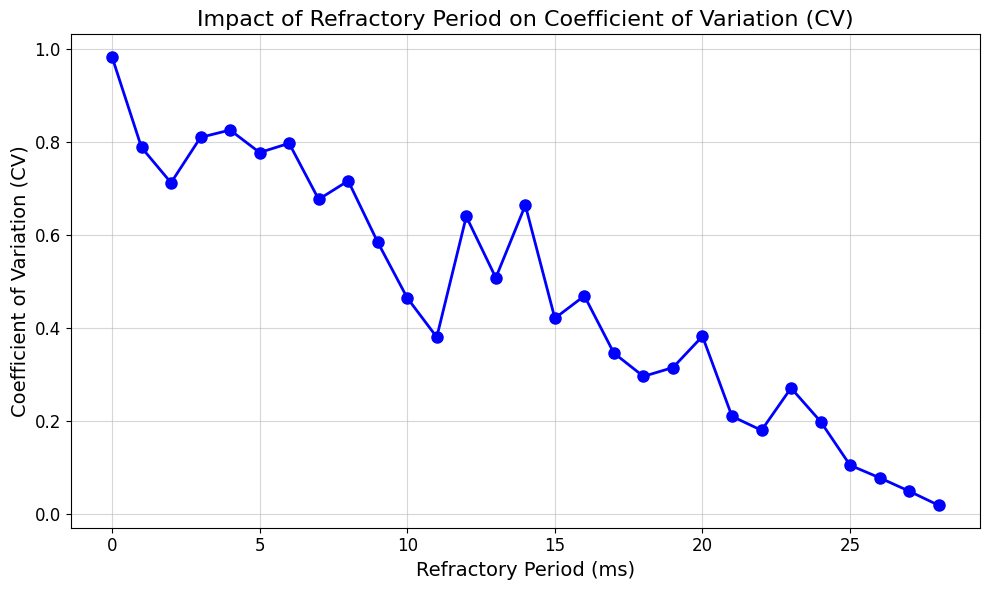

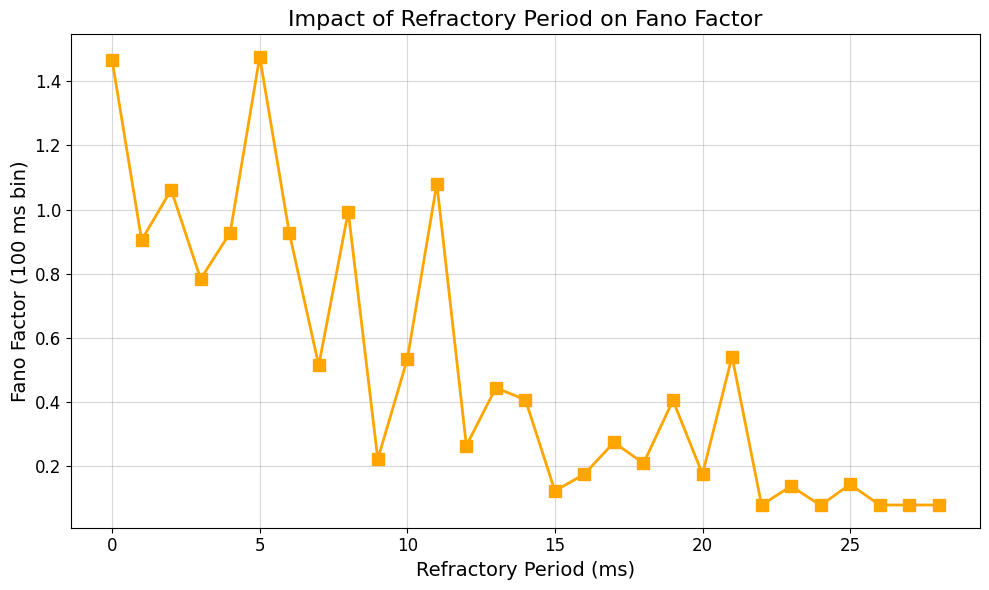

In [38]:
import numpy as np
import matplotlib.pyplot as plt

refractory_periods = np.arange(0, 0.029, 0.001)  # Refractory periods from 0 to 28 ms
cv_values = []
fano_factors = []

for refractory_period in refractory_periods:
    lambda_effective = firing_rate / (1 - firing_rate * refractory_period)
    n_spikes = int(lambda_effective * total_time) 
    isis_inhomogeneous = np.random.exponential(scale=1 / lambda_effective, size=n_spikes)
    spike_times_inhomogeneous = np.cumsum(isis_inhomogeneous)
    spike_times_inhomogeneous = spike_times_inhomogeneous[spike_times_inhomogeneous < total_time]

    valid_spike_times_inhom = []
    last_spike_time = -np.inf
    for t_index in range (0,len(spike_times_inhomogeneous)):
        if t_index == 0:
            valid_spike_times_inhom.append(spike_times_inhomogeneous[t_index])
            last_spike_time = spike_times_inhomogeneous[t_index]
            continue
        if spike_times_inhomogeneous[t_index] - last_spike_time >= refractory_period:
            valid_spike_times_inhom.append(spike_times_inhomogeneous[t_index])
            last_spike_time = spike_times_inhomogeneous[t_index]
    spike_times_inhom = [float(value) for value in valid_spike_times_inhom]
    print(f"Spike times (refractory period {refractory_period* 1000:.0f} ms): {spike_times_inhom}")
    print(spike_times_inhom)
    # Compute ISIs and metrics
    isis = np.diff(spike_times_inhom)
    cv_values.append(compute_cv(isis))
    fano_factors.append(compute_fano_factor(spike_times_inhom, 0.1))  # 100 ms bin


# Plot for Coefficient of Variation (CV)
plt.figure(figsize=(10, 6))
plt.plot(
    refractory_periods * 1000,
    cv_values,
    label="Coefficient of Variation (CV)",
    marker="o",
    linestyle="-",
    linewidth=2,
    markersize=8,
    color="blue",
)
plt.xlabel("Refractory Period (ms)", fontsize=14)
plt.ylabel("Coefficient of Variation (CV)", fontsize=14)
plt.title("Impact of Refractory Period on Coefficient of Variation (CV)", fontsize=16)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("cv_refractory_period_plot.png", dpi=300)
plt.show()

# Plot for Fano Factor
plt.figure(figsize=(10, 6))
plt.plot(
    refractory_periods * 1000,
    fano_factors,
    label="Fano Factor (100 ms bin)",
    marker="s",
    linestyle="-",
    linewidth=2,
    markersize=8,
    color="orange",
)
plt.xlabel("Refractory Period (ms)", fontsize=14)
plt.ylabel("Fano Factor (100 ms bin)", fontsize=14)
plt.title("Impact of Refractory Period on Fano Factor", fontsize=16)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("fano_refractory_period_plot.png", dpi=300)
plt.show()
